<a href="https://colab.research.google.com/github/yoonhyeyoon/DeepLearning/blob/main/Image_Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Category

Fully Connected Layer (Dense)를 활용한 이미지 분류 (Image Classification)

## 순서

1. **import**
2. **전처리**
3. **모델링(model)**
4. **컴파일(compile)**
5. **학습 (fit)**

## 문제

Create a classifier for the MNIST dataset
<br>Note that the test will expect it to classify 10 classes and that the 
<br>input shape should be the native size of the MNIST dataset which is 
<br>28x28 monochrome. Do not resize the data. Your input layer should accept
<br>\(28,28) as the input shape only. If you amend this, the tests will fail.

MNIST(손글씨) 데이터 세트에 대한 분류기를 작성하십시오.
<br>테스트는 10 개의 클래스를 분류 하도록 합니다.
<br>입력 모양은 28x28 (흑백) 인 MNIST 데이터 세트의 기본 크기 여야합니다. 
<br>데이터 크기를 조정하지 마십시오. 
<br>입력 레이어는 입력 모양으로 (28,28) 만 허용해야합니다. 
<br>이를 수정하면 테스트가 실패합니다.

------------------------------------

# 실습

## STEP 1. import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

## STEP 2. 전처리 (pre-processing)

**tf.keras.datasets** 에는 다양한 샘플 데이터를 제공해줌


[tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

* **fashion_mnist**: Fashion-MNIST 옷(패션) 데이터 셋

* **mnist**: MNIST 손글씨 데이터 셋

데이터 셋을 **로드** 한다. (mnist)

[코드]

In [ ]:
mnist = tf.keras.datasets.mnist

데이터 셋 로드: 
* **mnist.load_data()**
* **fashion_mnist.load_data()**

데이터 셋을 불러와, train / validation 세트를 구성한다.

[코드] 

In [ ]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


정상적으로 로드되었는지, **확인**

In [ ]:
x_train.shape, x_valid.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_valid.shape

((60000,), (10000,))

**데이터셋 시각화**

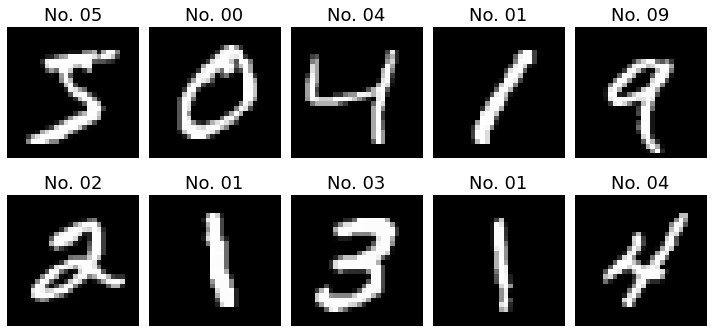

In [ ]:
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title('No. %02d' % y_train[i], fontsize=18)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
    axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

**이미지 정규화 (Normalization)**

* 모든 이미지 픽셀(pixel)값들을 0~1 사이의 값으로 정규화
* x_train, x_valid 에 대해서만 정규화

[코드]

In [ ]:
x_train.min(), x_train.max()

(0, 255)

In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

## STEP 3. 모델 정의 (Sequential)

Modeling

`Sequential` 모델 안에서 층을 깊게 쌓아 올려 준다.

1. Dense 레이어는 2D 형태의 데이터를 받아들이지 못한다. Flatten 레이어로 2D -> 1D로 변환
2. 깊은 출력층과 더 많은 Layer를 쌓는다.
3. Dense Layer에 `activation='relu'`를 적용한다.
4. 분류(Classification)의 마지막 층의 출력 숫자는 분류하고자 하는 클래스 갯수와 **같아야** 한다.


[코드]

In [ ]:
model = Sequential([
    # Flatten으로 shape 펼치기, input_shape는 (28, 28)로 지정
    Flatten(input_shape=(28, 28)),
    # Dense Layer
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    # Classification을 위한 Softmax 
    Dense(10, activation='softmax'),
    # 출력층의 갯수는 클래스의 갯수와 동일하게 맞춰준다. (10개), activation 잊지않기
    
])

모델에 대한 **요약**을 확인

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2

## STEP 4. optimizer, loss

1. `optimizer`는 가장 최적화가 잘되는 알고리즘인 'adam'을 사용
2. `loss`는 무엇을 지정하면 좋을까? (`categorical_crossentropy` / `sparse_categorical_crossentropy`)
3. `metrics`를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 할 수 있다.

[코드]

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

## STEP 5. ModelCheckpoint

`val_loss` 기준으로 epoch 마다 최적의 모델을 저장하기 위하여, ModelCheckpoint를 만든다.
* `checkpoint_path`는 모델이 저장될 파일 명을 설정
* `ModelCheckpoint`을 선언하고, 적절한 옵션 값을 지정

[코드]

In [ ]:
checkpoint_path = "my_checkpoint.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

## STEP 6. 학습 (fit)

1. `validation_data`를 반드시 지정
2. `epochs`을 적절하게 지정
3. `callbacks`에 바로 위에서 만든 checkpoint를 지정

[코드]

In [ ]:
history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    callbacks=[checkpoint],
                    )

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2406 - acc: 0.9300 - val_loss: 0.1199 - val_acc: 0.9651

Epoch 00001: val_loss improved from inf to 0.11986, saving model to my_checkpoint.ckpt
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1053 - acc: 0.9700 - val_loss: 0.1094 - val_acc: 0.9716

Epoch 00002: val_loss improved from 0.11986 to 0.10936, saving model to my_checkpoint.ckpt
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0788 - acc: 0.9780 - val_loss: 0.0795 - val_acc: 0.9796

Epoch 00003: val_loss improved from 0.10936 to 0.07953, saving model to my_checkpoint.ckpt
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0637 - acc: 0.9823 - val_loss: 0.0983 - val_acc: 0.9750

Epoch 00004: val_loss did not improve from 0.07953
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0502 - acc: 0.9859 - val_loss: 0.0896 - val_acc: 0.9774

Epoch

## STEP 7. 학습 완료 후 Load Weights (ModelCheckpoint)

학습이 완료된 후에는 반드시 `load_weights`를 해주어야 한다.

그렇지 않으면, 열심히 ModelCheckpoint를 만든 의미가 없음

[코드]

In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
model.evaluate(x_valid, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - acc: 0.9822


[0.06906812638044357, 0.982200026512146]